In [19]:
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.realpath(".."))
import data_reader as read
import clinical_text_analysis as cta
import time
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pickle as pkl

In [4]:
%%bash
ls ..

AHBUECFIGZKBDIJZ.h5
CFGBAITZXXOKDPDZ.h5
CMXUKNWJVFRTKXNG.h5
HJAVOELVYEDIRXLY.h5
JOFSNWKYIQXQXVIA.h5
KHNQOVHXFYJWKWPN.h5
NWQOURXAWOWPYHBO.h5
PEDBQLBZADRWSIOL.h5
QQXFPIYMDIAVWVQL.h5
README.md
RNVZMCQJBDFXIRVP.h5
UCYJLUDKAVBYYGQZ.h5
UYLGBAFUBVWWFGLJ.h5
VMZVTJOBSQNRLNWH.h5
VSIGAOGNTVTDJDNG.h5
WIDUGLOHTFLGVGMA.h5
XMPIKYZHBWVPBCMY.h5
YBZQCIYNROPJPCDG.h5
YCAHHKVWETSQUVBE.h5
__pycache__
assets
bin_acc_AHBUECFIGZKBDIJZ.h5
bin_acc_NWQOURXAWOWPYHBO.h5
bin_acc_PEDBQLBZADRWSIOL.h5
bin_acc_QQXFPIYMDIAVWVQL.h5
bin_acc_RNVZMCQJBDFXIRVP.h5
bin_acc_UCYJLUDKAVBYYGQZ.h5
bin_acc_YBZQCIYNROPJPCDG.h5
clinical_text_analysis.py
cnnInception.py
config.json
constants.py
data_reader.py
edf_ensemble_path.pkl
ensembleReader.py
env.yaml
environmentSetup.sh
initial_clustering.py
keras_models
native_edf_ensemble_path.pkl
notebooks
organize_files.py
out
output.err
predictAgeConvExp.py
predictAgeExp.py
predictBPMExp.py
predictGenderConvExp.py
predictGenderExp.py
predictGenderrf.pkl
predictSeizureConvExp.py
rf_fft_data.p

In [6]:
rf = pkl.load(open("../predictGenderrf.pkl","rb"))

In [33]:
testDataY = pkl.load(open("../trainGenderData.pkl", "rb"))

In [42]:
trainDataY = pkl.load(open("../testGenderData.pkl", "rb"))

In [31]:
from predictGenderExp import get_data

In [43]:
trainDataX = trainDataY[0]
trainDataY = trainDataY[1]

In [38]:
testDataX = testDataY[0]
testDataY = testDataY[1]

In [8]:
type(testDataY)

tuple

In [44]:
trainDataX

array([[1.04598912e+08, 1.02078656e+08, 8.46691840e+07, ...,
        7.87795007e-01, 2.86783040e-01, 3.62780541e-01],
       [5.24517120e+07, 4.39620160e+07, 7.18198560e+07, ...,
        2.67438233e-01, 1.14555307e-01, 2.14164048e-01],
       [5.35738880e+07, 5.17958560e+07, 1.12696960e+08, ...,
        5.20541966e-01, 1.49909005e-01, 3.65883261e-01],
       ...,
       [4.55952256e+08, 3.89453696e+08, 4.11091840e+08, ...,
        4.90530252e-01, 1.28083890e-02, 1.15014100e-02],
       [2.71083648e+08, 9.03186688e+08, 9.72134528e+08, ...,
        1.35354593e-01, 8.32748190e-02, 5.47178760e-02],
       [1.76751296e+08, 1.36424128e+08, 1.23917504e+08, ...,
        5.99283516e-01, 6.34430289e-01, 4.94296879e-01]])

In [10]:
len(testDataY[0])

28764

In [11]:
testDataY[1].shape

(28764,)

In [14]:
testDataX = np.stack(testDataY[0]).reshape(28764, 5*21)

In [15]:
testDataY = testDataY[1]

In [17]:
rf.keys()

dict_keys(['getFeatureScores', 'best_params_'])

In [18]:
rf.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 8,
 'rf__max_features': 0.1,
 'rf__min_samples_split': 8,
 'rf__min_weight_fraction_leaf': 0.2,
 'rf__n_estimators': 50,
 'rf__n_jobs': 1}

In [57]:
rfClf = RandomForestClassifier(criterion='gini', max_depth=8, max_features=0.1, min_samples_split=8, min_weight_fraction_leaf=0.2, n_estimators=50, n_jobs=1)

In [58]:
rfClf = rfClf.fit(trainDataX, trainDataY)

/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [59]:
y_pred = rfClf.predict(testDataX)

In [73]:
y_pred_prob = rfClf.predict_proba(testDataX)

In [74]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve

In [76]:
testDataY.shape

(2618, 1)

In [80]:
y_pred_p = y_pred_prob[:,1]/ y_pred_prob.sum(1)

In [82]:
rc = roc_curve(testDataY, y_pred_p,)

In [86]:
import matplotlib.pyplot as plt

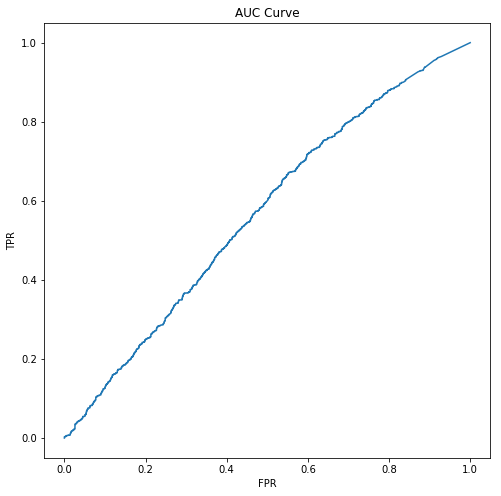

In [90]:
plt.figure(figsize=(8,8))
plt.title("AUC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(rc[0], rc[1])

In [64]:
accuracy_score(testDataY, y_pred)

0.5416348357524828

In [67]:
cm = confusion_matrix(testDataY, y_pred)

In [94]:
truY = [1,1,1,1,1,1,1,1]
predY =[0,0,0,0,0,0,0,0]

In [99]:
confusion_matrix(truY, predY)

array([[0, 0],
       [8, 0]])

In [71]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

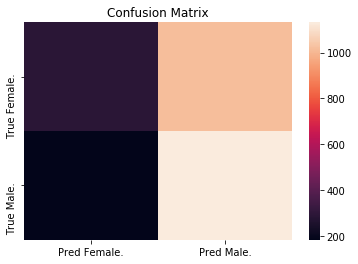

In [102]:
sns.heatmap(cm, yticklabels=["True Female.", "True Male."], xticklabels=["Pred Female.", "Pred Male."])
plt.title("Confusion Matrix")

In [ ]:
sns.